Setup Inicial

In [38]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

Exploracion Inicial

In [39]:
sns.set(style="whitegrid")
mlflow.autolog()
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("Default")
run_name = 'diabetes_log_reg'


2024/10/09 17:54:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [40]:
path = r"..\data\raw\diabetes_data_upload.csv"
raw_diabetes_df = pd.read_csv(path)
raw_diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [41]:
raw_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [42]:
raw_diabetes_df.head().T

,0,1,2,3,4
Age,40,58,41,45,60
Gender,Male,Male,Male,Male,Male
Polyuria,No,No,Yes,No,Yes
Polydipsia,Yes,No,No,No,Yes
sudden weight loss,No,No,No,Yes,Yes
weakness,Yes,Yes,Yes,Yes,Yes
Polyphagia,No,No,Yes,Yes,Yes
Genital thrush,No,No,No,Yes,No
visual blurring,No,Yes,No,No,Yes
Itching,Yes,No,Yes,Yes,Yes


In [43]:
raw_diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


Transformación de variables escalares a booleanas

In [56]:
raw_diabetes_df['Gender'] = raw_diabetes_df['Gender'] == 'Male'
raw_diabetes_df['class'] = raw_diabetes_df['class'] == 'Positive'
for column in raw_diabetes_df.columns[2:-1]:
    raw_diabetes_df[column] = raw_diabetes_df[column] == 'Yes'

Visualizaciones básicas

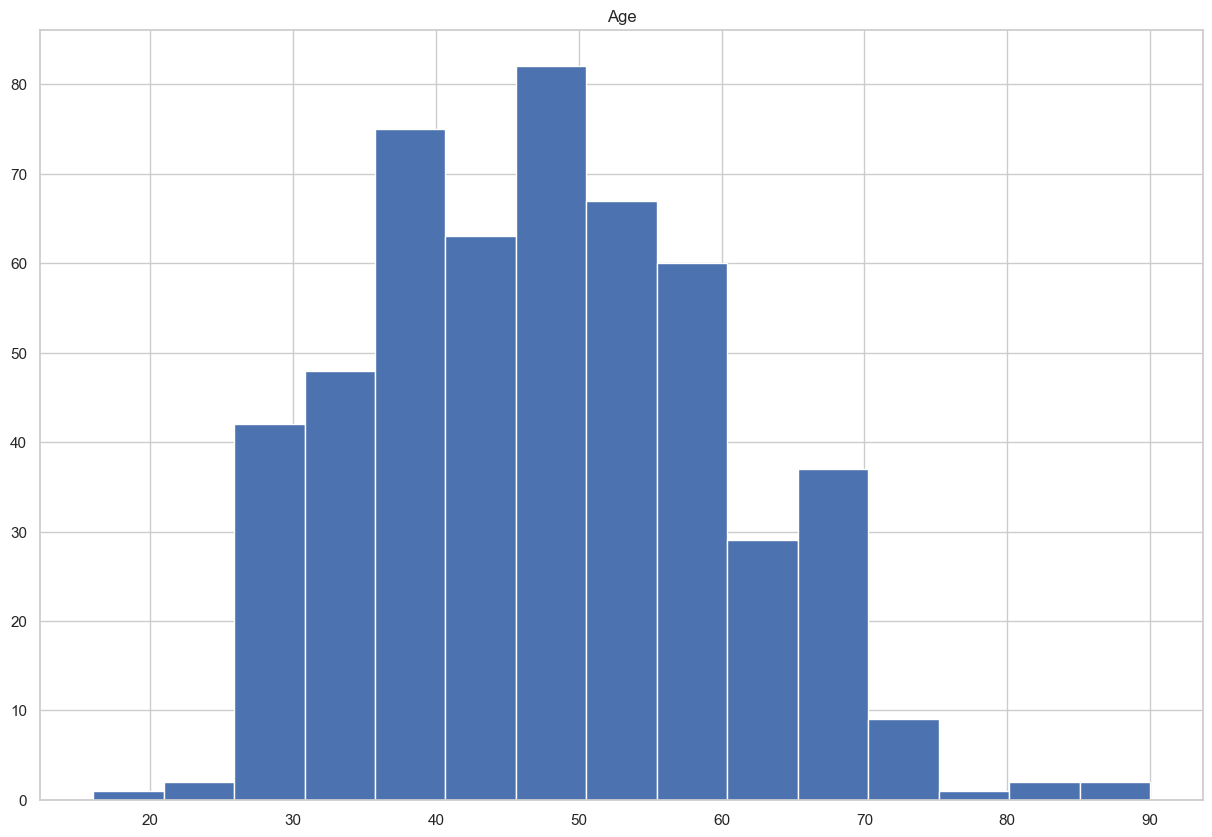

In [45]:
raw_diabetes_df.hist(bins=15, figsize=(15,10))
plt.show()

<Axes: >

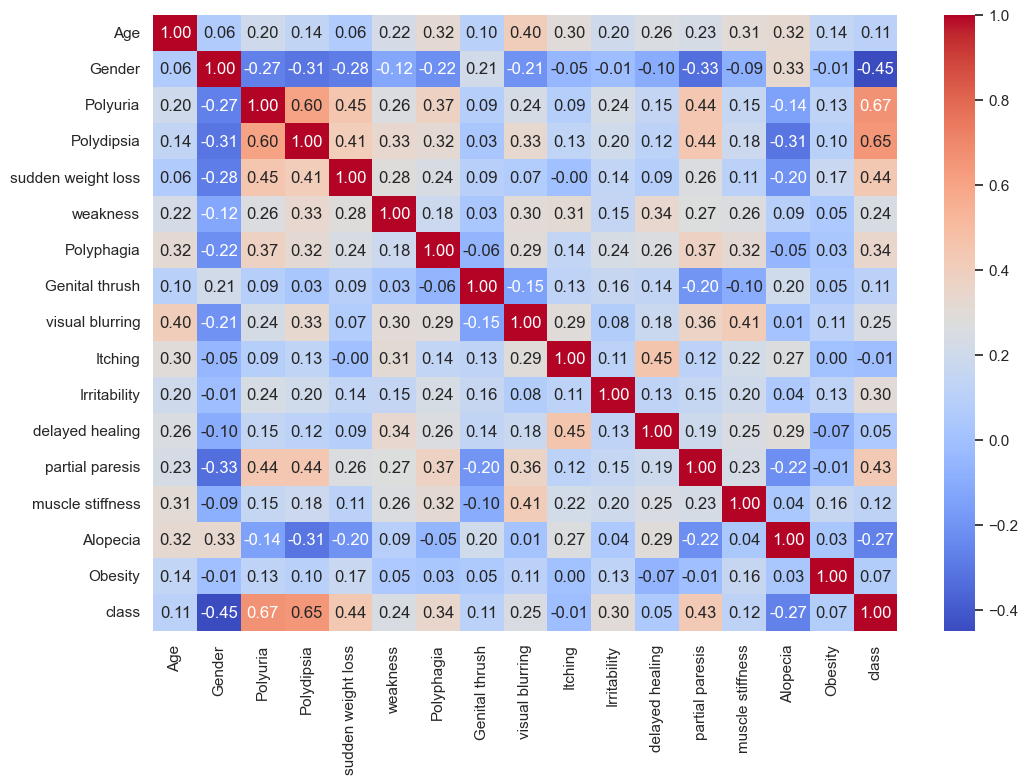

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(raw_diabetes_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")

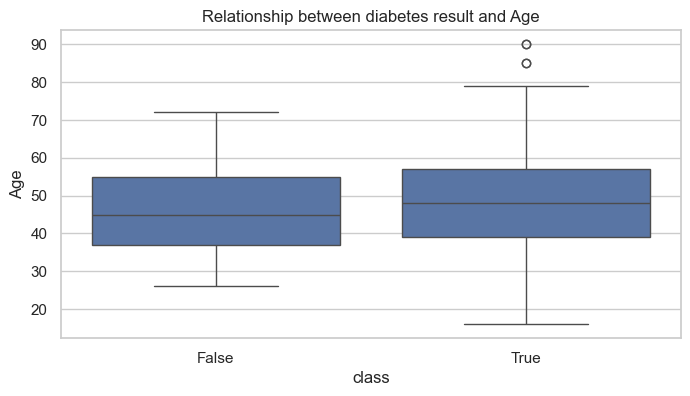

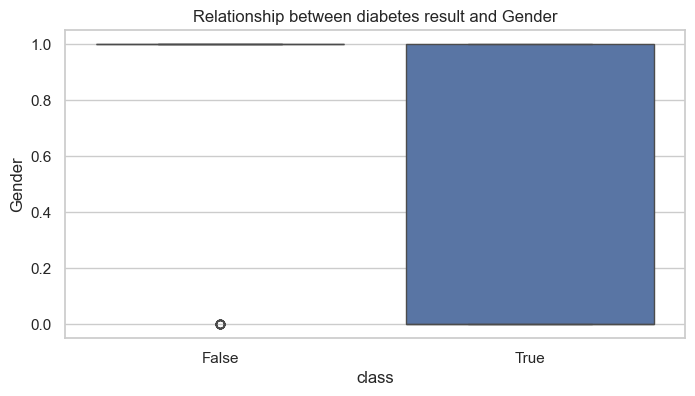

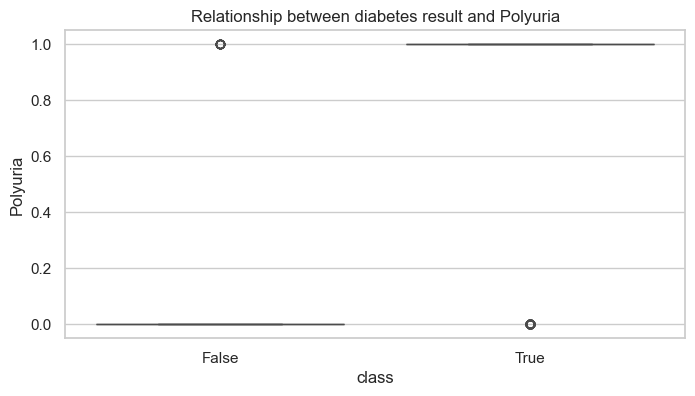

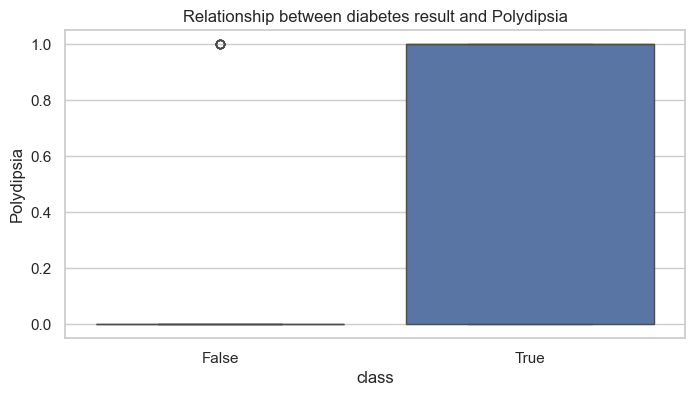

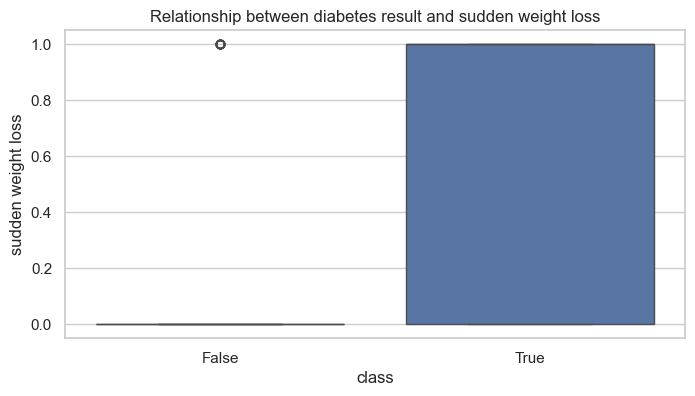

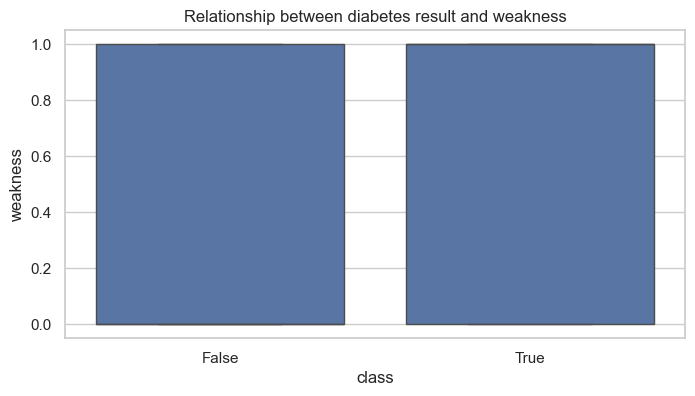

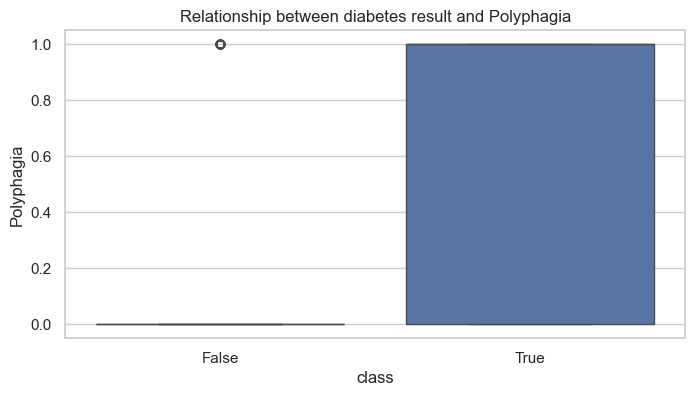

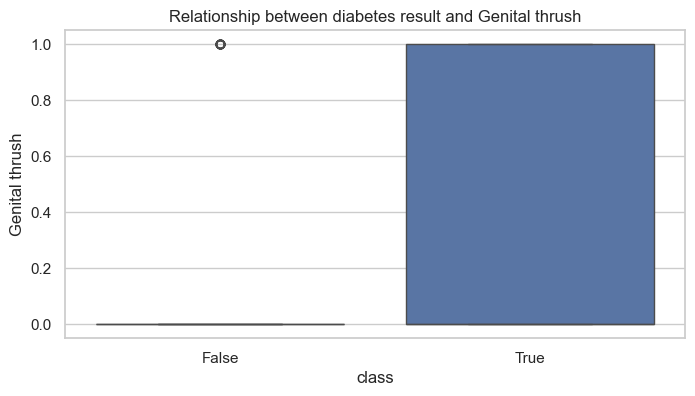

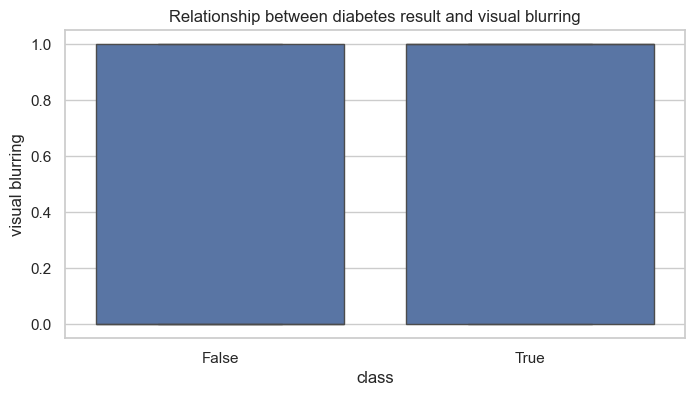

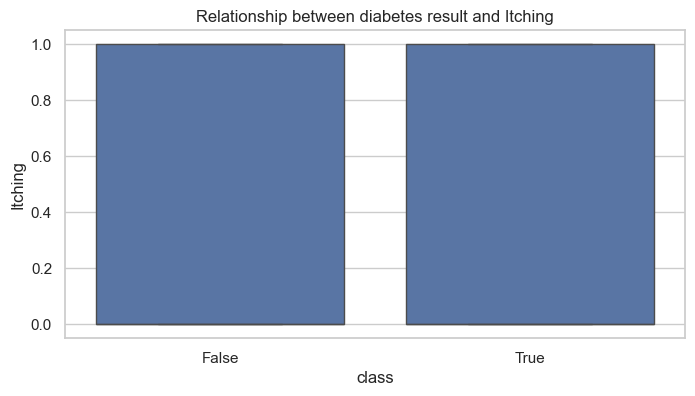

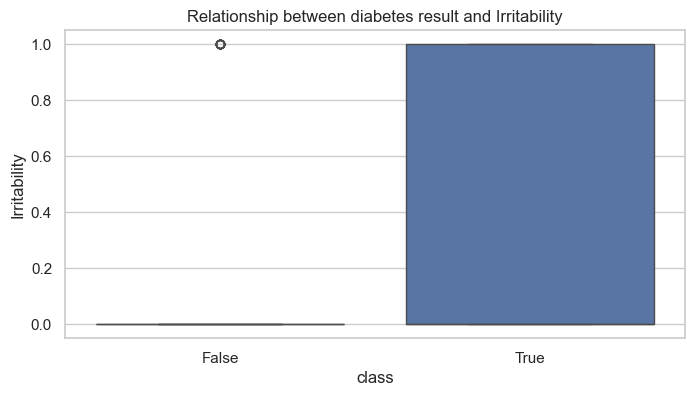

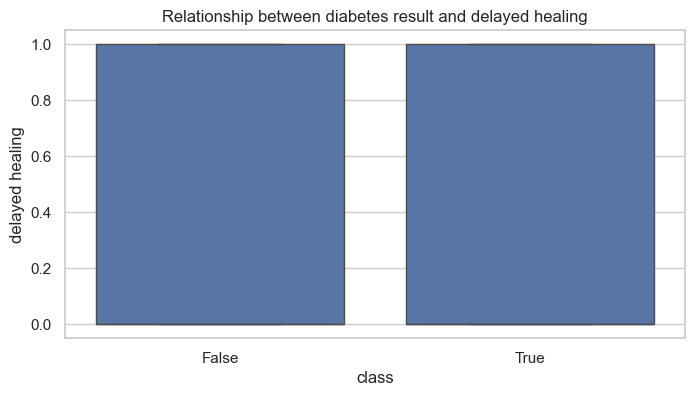

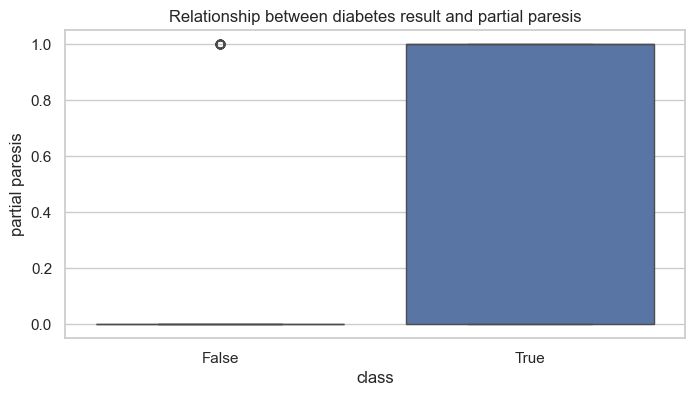

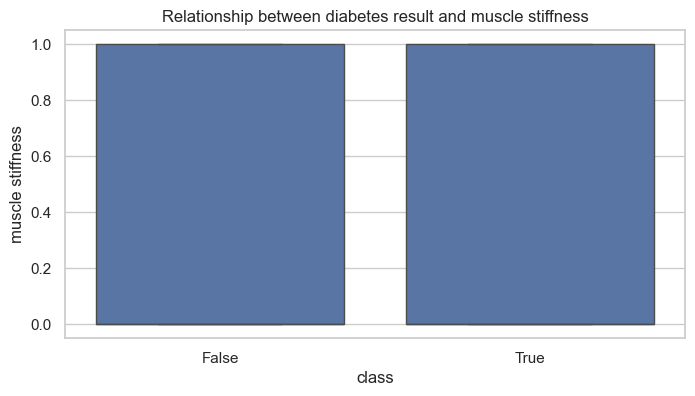

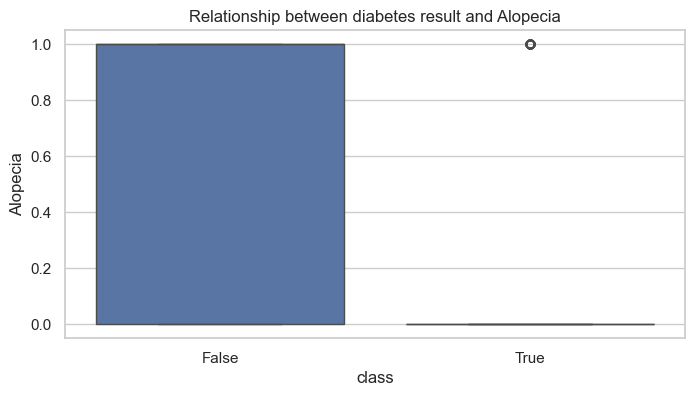

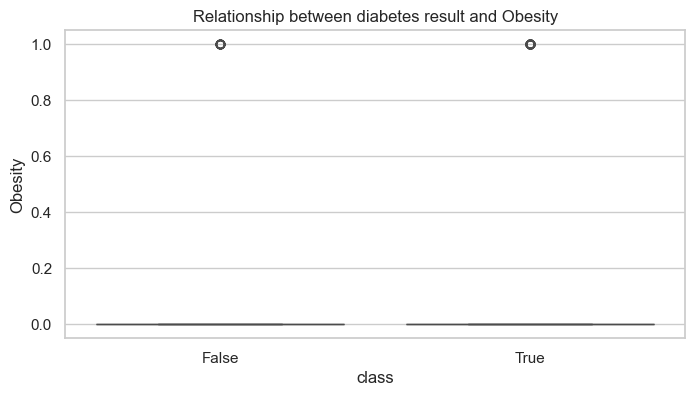

In [47]:
for column in raw_diabetes_df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=column, data=raw_diabetes_df)
    plt.title(f'Relationship between diabetes result and {column}')
    plt.show()

Preprocesado e Ingeniería de Características

In [48]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(raw_diabetes_df.drop('class', axis=1))
diabetes_df_scaled = pd.DataFrame(features_scaled, columns=raw_diabetes_df.columns[:-1])
diabetes_df_scaled['class'] = raw_diabetes_df['class']

Particionamiento

In [49]:
X = diabetes_df_scaled.drop('class', axis=1)
y = diabetes_df_scaled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento del modelo

In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

2024/10/09 17:54:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8a586ebdc44544eb9da26a826aee95aa', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/10/09 17:54:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run classy-shrew-344 at: http://127.0.0.1:5000/#/experiments/0/runs/8a586ebdc44544eb9da26a826aee95aa.
2024/10/09 17:54:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


LogisticRegression(max_iter=1000)

Evaluación

In [51]:
y_pred = model.predict(X_test)

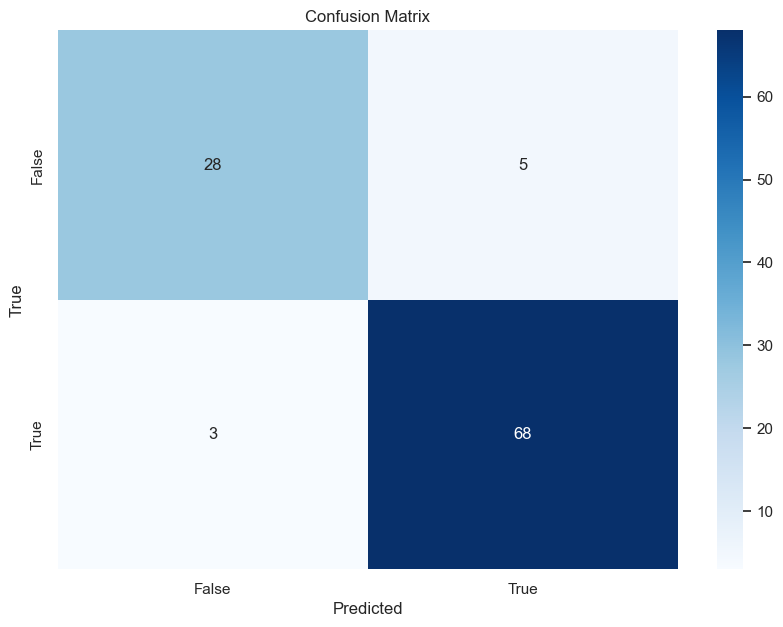

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

              precision    recall  f1-score     support
False          0.903226  0.848485  0.875000   33.000000
True           0.931507  0.957746  0.944444   71.000000
accuracy       0.923077  0.923077  0.923077    0.923077
macro avg      0.917366  0.903116  0.909722  104.000000
weighted avg   0.922533  0.923077  0.922409  104.000000


Mejoras del modelo

In [54]:
scores = cross_val_score(model, X, y, cv=10)
print("Average accuracy with CV:", np.mean(scores))

Average accuracy with CV: 0.9269230769230768


In [37]:
with mlflow.start_run() as run:
    mlflow.sklearn.log_model(model, "model")
    mlflow.log_params(model.get_params())

2024/10/09 17:43:41 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ALEJAN~1.AGU\AppData\Local\Temp\tmpsnmx73te\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/09 17:43:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/09 17:43:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run caring-slug-802 at: http://127.0.0.1:5000/#/experiments/0/runs/c5f9a49c08c9434a9453aadf1ac97c5c.
2024/10/09 17:43:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.
